In [188]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('Equity-TATAGLOBAL.csv',index_col="Date",parse_dates=True)
dataset

,Open,High,Low,Last,Close,Total Trade,Volume
Date,,,,,,,
2015-01-20,156.80,157.45,155.60,156.80,156.35,11284,1211357
2015-01-21,157.40,159.40,156.65,158.00,158.00,19549,2696995
2015-01-22,157.10,160.60,157.10,159.05,158.85,18186,2326838
2015-01-23,159.15,162.15,156.90,160.50,161.15,15494,2437301
2015-01-27,161.00,162.00,158.60,159.30,159.40,16325,1634586
...,...,...,...,...,...,...,...
2020-01-13,343.00,353.85,342.05,353.00,352.95,68666,7399348
2020-01-14,360.50,392.00,358.00,389.10,389.60,304985,44997621
2020-01-15,389.50,395.95,385.00,390.60,391.45,206689,24437080


In [189]:
#Data cleaning
dataset.isna().any()

Open           False
High           False
Low            False
Last           False
Close          False
Total Trade    False
Volume         False
dtype: bool

In [190]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2015-01-20 to 2020-01-17
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1234 non-null   float64
 1   High         1234 non-null   float64
 2   Low          1234 non-null   float64
 3   Last         1234 non-null   float64
 4   Close        1234 non-null   float64
 5   Total Trade  1234 non-null   int64  
 6   Volume       1234 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 77.1 KB


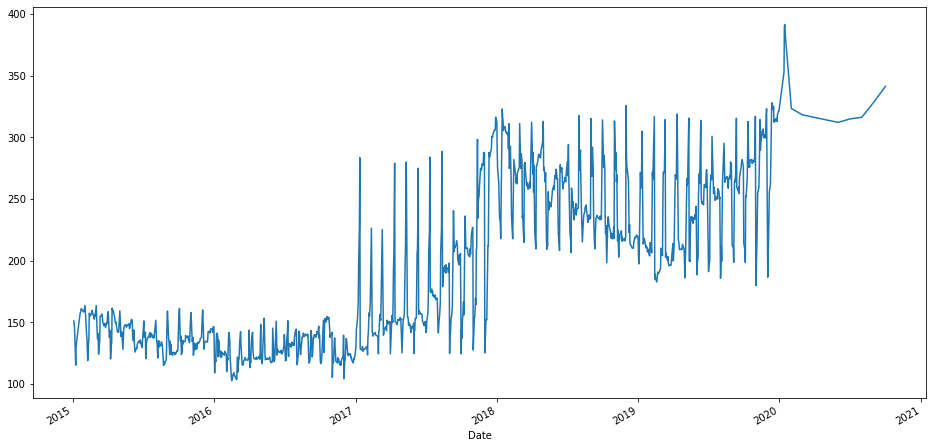

In [191]:
dataset['Close'].plot(figsize=(16,8))

In [192]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Last,Close,Total Trade,Volume
Date,,,,,,,
2015-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-29,158.457143,160.321429,157.114286,158.571429,158.678571,15508.000000,2.135643e+06
2015-01-30,158.764286,161.028571,156.892857,158.992857,159.014286,17126.428571,2.547502e+06
2015-02-02,158.835714,162.221429,157.050000,159.771429,159.814286,18448.428571,2.937032e+06


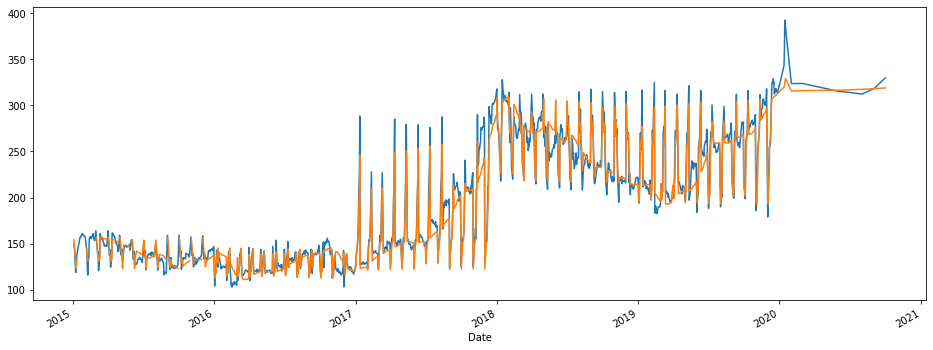

In [193]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

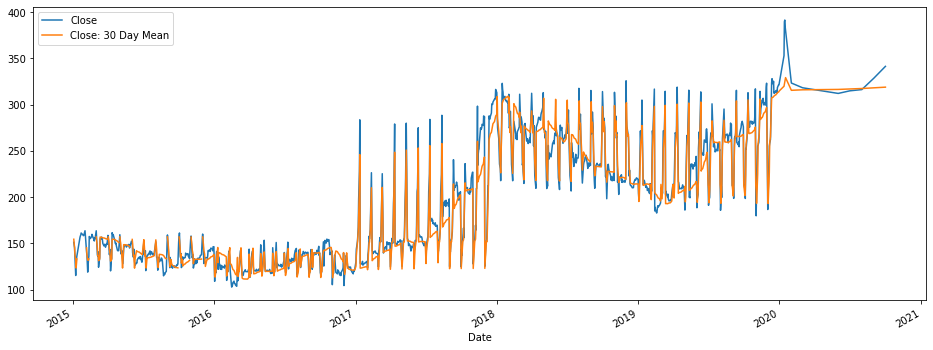

In [194]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

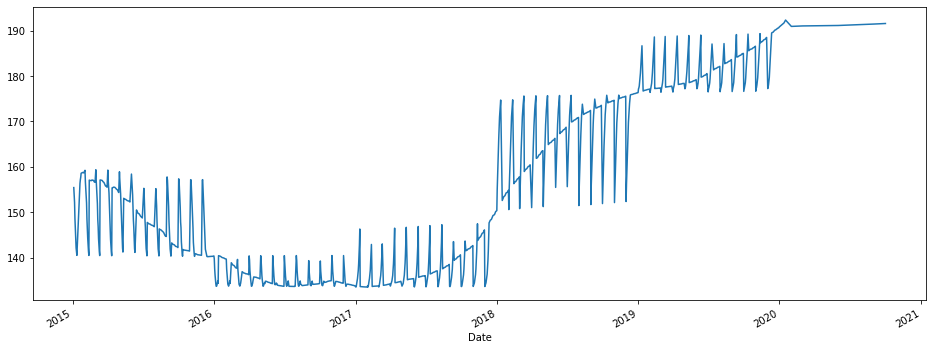

In [195]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [196]:
training_set =dataset['Close']
training_set =pd.DataFrame(training_set)
training_set

,Close
Date,
2015-01-20,156.35
2015-01-21,158.00
2015-01-22,158.85
2015-01-23,161.15
2015-01-27,159.40
...,...
2020-01-13,352.95
2020-01-14,389.60
2020-01-15,391.45


In [197]:
#Feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.18594183],
       [0.19165512],
       [0.19459834],
       ...,
       [1.        ],
       [0.97506925],
       [0.96139197]])

In [198]:
#Create a data structure with 100 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train =np.array(X_train), np.array(y_train)

#Reshaping
X_train =np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [199]:
len(training_set_scaled)

1234

In [200]:
X_train

array([[[0.18594183],
        [0.19165512],
        [0.19459834],
        ...,
        [0.19615651],
        [0.19009695],
        [0.17520776]],

       [[0.19165512],
        [0.19459834],
        [0.20256233],
        ...,
        [0.19009695],
        [0.17520776],
        [0.16464681]],

       [[0.19459834],
        [0.20256233],
        [0.19650277],
        ...,
        [0.17520776],
        [0.16464681],
        [0.16274238]],

       ...,

       [[0.62101801],
        [0.62015235],
        [0.6101108 ],
        ...,
        [0.82652355],
        [0.86668975],
        [0.99359418]],

       [[0.62015235],
        [0.6101108 ],
        [0.61790166],
        ...,
        [0.86668975],
        [0.99359418],
        [1.        ]],

       [[0.6101108 ],
        [0.61790166],
        [0.61270776],
        ...,
        [0.99359418],
        [1.        ],
        [0.97506925]]])

In [201]:
y_train

array([0.16464681, 0.16274238, 0.16464681, ..., 1.        , 0.97506925,
       0.96139197])

In [202]:
#Build the RNN
#Importing the KEras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [203]:
#Initailising the RNN
regressor =Sequential()

In [204]:
#Adding the first LSTM layer and some dropuout regularization
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding the second LSTM layer and some dropuout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the third LSTM layer and some dropuout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the fourth LSTM layer and some dropuout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding th output layer
regressor.add(Dense(units = 1))

In [205]:
#Compiling the RNN
regressor.compile(optimizer = 'adam' ,loss = 'mean_squared_error')

#Fitting th RNN to the Training set
regressor.fit(X_train,y_train, epochs = 100, batch_size = 128)

Epoch 1/100
1174/1174 [==============================] - 8s 7ms/step - loss: 0.0552
Epoch 2/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0139
Epoch 3/100
1174/1174 [==============================] - 5s 4ms/step - loss: 0.0070
Epoch 4/100
1174/1174 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 5/100
1174/1174 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 6/100
1174/1174 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 7/100
1174/1174 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 8/100
1174/1174 [==============================] - 4s 4ms/step - loss: 0.0036
Epoch 9/100
1174/1174 [==============================] - 5s 5ms/step - loss: 0.0038
Epoch 10/100
1174/1174 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 11/100
1174/1174 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 12/100
1174/1174 [==============================] - 4s 3ms/step - lo

1174/1174 [==============================] - 4s 3ms/step - loss: 0.0018
Epoch 98/100
1174/1174 [==============================] - ETA: 0s - loss: 0.002 - 5s 4ms/step - loss: 0.0020
Epoch 99/100
1174/1174 [==============================] - 5s 4ms/step - loss: 0.0021
Epoch 100/100
1174/1174 [==============================] - 5s 4ms/step - loss: 0.0019


In [206]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)               

In [207]:
dataset_test = pd.read_csv("Equity-Tataglobal_TEST.csv",index_col='Date',parse_dates=True)
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-20,382.000000,385.549988,377.149994,382.899994,382.899994,304866
2020-01-21,382.899994,389.600006,379.250000,385.799988,385.799988,290471
2020-01-22,387.100006,388.500000,382.399994,384.799988,384.799988,214951
2020-01-23,385.149994,399.399994,384.049988,393.000000,393.000000,551050
2020-01-24,393.100006,394.799988,383.850006,384.600006,384.600006,193510


In [208]:
real_stock_price =dataset_test.iloc[:,3].values
real_stock_price

array([382.899994, 385.799988, 384.799988, 393.      , 384.600006,
       382.25    , 381.      , 383.649994, 380.950012, 383.399994,
       379.100006, 379.75    , 394.600006, 392.149994, 396.450012,
       392.450012, 390.5     , 394.850006, 392.350006, 396.899994,
       381.049988, 382.049988, 383.100006, 380.5     , 369.350006,
       369.5     , 365.25    , 363.399994, 345.899994, 337.799988,
       355.200012, 349.      , 348.100006])

In [209]:
test_set=dataset_test['Close']
test_set=pd.DataFrame(test_set)
test_set

,Close
Date,
2020-01-20,382.899994
2020-01-21,385.799988
2020-01-22,384.799988
2020-01-23,393.000000
2020-01-24,384.600006
2020-01-27,382.250000
2020-01-28,381.000000
2020-01-29,383.649994
2020-01-30,380.950012


In [210]:
dataset_total = pd.concat((dataset['Close'],dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test =[]
for i in range(60,93):
    X_test.append(inputs[i-60:i, 0])
X_test =np.array(X_test)
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[349.60287],
       [360.21887],
       [368.59094],
       [374.19943],
       [377.41046],
       [378.4117 ],
       [377.52026],
       [375.1933 ],
       [372.1058 ],
       [368.76373],
       [365.68756],
       [363.06314],
       [361.019  ],
       [360.18198],
       [360.70764],
       [362.59177],
       [365.36148],
       [368.3776 ],
       [371.29004],
       [373.7436 ],
       [375.72623],
       [376.62088],
       [376.2478 ],
       [374.81754],
       [372.62405],
       [369.62836],
       [366.04626],
       [362.09357],
       [358.04538],
       [353.60663],
       [348.53012],
       [343.58163],
       [339.2538 ]], dtype=float32)

In [215]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price

,0
0,349.602875
1,360.218872
2,368.590942
3,374.199432
4,377.410461
5,378.411713
6,377.520264
7,375.193298
8,372.105804
9,368.763733


In [216]:
real_stock_price=pd.DataFrame(real_stock_price)
real_stock_price

,0
0,382.899994
1,385.799988
2,384.799988
3,393.000000
4,384.600006
5,382.250000
6,381.000000
7,383.649994
8,380.950012
9,383.399994


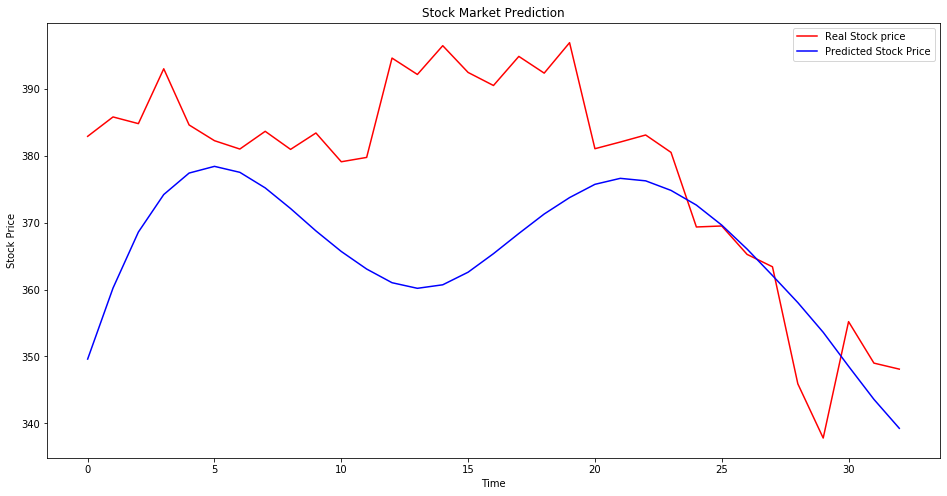

In [217]:
#Visualizing the results
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(real_stock_price,color = 'red', label = 'Real Stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Market Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [220]:
rmse=np.sqrt(np.mean(((predicted_stock_price - real_stock_price)**2)))
rmse

0    17.931571
dtype: float64